In [1]:
#Model Driven Model

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
airlines = pd.read_csv("/content/sample_data/Airlines+Data.csv")
airlines.head()

,Month,Passengers
0,Jan-95,112
1,Feb-95,118
2,Mar-95,132
3,Apr-95,129
4,May-95,121


In [7]:
airlines.shape

(96, 2)

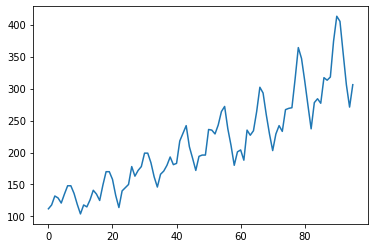

In [8]:
airlines.Passengers.plot()

In [10]:
airlines['t']=np.arange(1,97)

In [11]:
airlines["t_squared"] = airlines["t"]*airlines["t"]

In [12]:
airlines["log_Passengers"] = np.log(airlines["Passengers"])

In [15]:
airlines.head()

,Month,Passengers,t,t_squared,log_Passengers,Date,month,year
0,Jan-95,112,1,1,4.718499,1995-01-01,Jan,1995
1,Feb-95,118,2,4,4.770685,1995-02-01,Feb,1995
2,Mar-95,132,3,9,4.882802,1995-03-01,Mar,1995
3,Apr-95,129,4,16,4.859812,1995-04-01,Apr,1995
4,May-95,121,5,25,4.795791,1995-05-01,May,1995


In [14]:
airlines["Date"] = pd.to_datetime(airlines.Month,format="%b-%y")

airlines["month"] = airlines.Date.dt.strftime("%b") # month extraction
airlines["year"] = airlines.Date.dt.strftime("%Y") # year extraction


In [17]:
month_dummies=pd.get_dummies(airlines['month'])

In [18]:
airlines = airlines.join(month_dummies)

In [19]:
airlines.head()

,Month,Passengers,t,t_squared,log_Passengers,Date,month,year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,Jan-95,112,1,1,4.718499,1995-01-01,Jan,1995,0,0,0,0,1,0,0,0,0,0,0,0
1,Feb-95,118,2,4,4.770685,1995-02-01,Feb,1995,0,0,0,1,0,0,0,0,0,0,0,0
2,Mar-95,132,3,9,4.882802,1995-03-01,Mar,1995,0,0,0,0,0,0,0,1,0,0,0,0
3,Apr-95,129,4,16,4.859812,1995-04-01,Apr,1995,1,0,0,0,0,0,0,0,0,0,0,0
4,May-95,121,5,25,4.795791,1995-05-01,May,1995,0,0,0,0,0,0,0,0,1,0,0,0


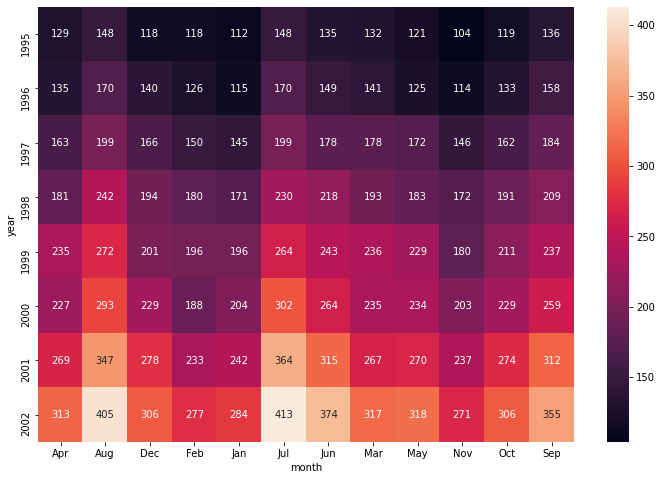

In [21]:
plt.figure(figsize=(12,8))
heatmap_y_month = pd.pivot_table(data=airlines,values="Passengers",index="year",columns="month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g") #fmt is format of the grid values

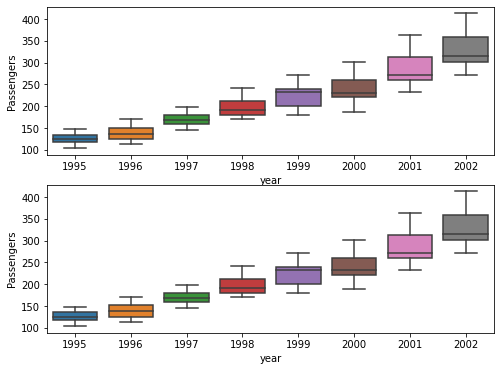

In [22]:
# Boxplot for ever
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x="year",y="Passengers",data=airlines)
plt.subplot(212)
sns.boxplot(x="year",y="Passengers",data=airlines)

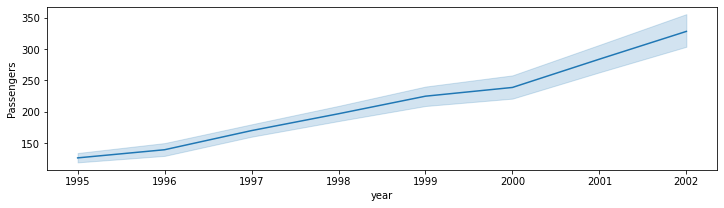

In [23]:
plt.figure(figsize=(12,3))
sns.lineplot(x="year",y="Passengers",data=airlines)

# Splitting Data


In [25]:
airlines.shape

(96, 20)

In [26]:
Train = airlines.head(86)
Test = airlines.tail(10)

In [28]:
#Linear Model
import statsmodels.formula.api as smf 

linear_model = smf.ols('Passengers~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_linear))**2))
rmse_linear

58.64314972778256

In [34]:
#Exponential

Exp = smf.ols('log_Passengers~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

49.90312334789315

In [32]:
#Quadratic 

Quad = smf.ols('Passengers~t+t_squared',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_squared"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_Quad))**2))
rmse_Quad

53.91436357852554

In [40]:
#Additive seasonality 

add_sea = smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea))**2))
rmse_add_sea

136.79010436819325

In [41]:
#Additive Seasonality Quadratic 

add_sea_Quad = smf.ols('Passengers~t+t_squared+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','t','t_squared']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

29.104549899228786

In [42]:
##Multiplicative Seasonality

Mul_sea = smf.ols('log_Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

144.38493549461418

In [43]:
#Multiplicative Additive Seasonality 

Mul_Add_sea = smf.ols('log_Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea 

11.26495833035545

In [44]:
#Compare the results 

data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
6,rmse_Mult_add_sea,11.264958
4,rmse_add_sea_quad,29.104550
1,rmse_Exp,49.903123
2,rmse_Quad,53.914364
0,rmse_linear,58.643150
3,rmse_add_sea,136.790104
5,rmse_Mult_sea,144.384935


In [49]:
#Best Model is Multiplicative Additive Seasonality

In [45]:
#Build the model on entire data set
model_full = smf.ols('log_Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data = Train).fit()

In [50]:
pred_new  = pd.Series(model_full.predict(Test))
np.exp(pred_new)

86    327.613010
87    316.113588
88    313.056237
89    352.392174
90    392.292534
91    392.439833
92    352.559773
93    310.362223
94    272.055527
95    312.532129
dtype: float64

In [48]:
airlines.tail(10)

,Month,Passengers,t,t_squared,log_Passengers,Date,month,year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
86,Mar-02,317,87,7569,5.758902,2002-03-01,Mar,2002,0,0,0,0,0,0,0,1,0,0,0,0
87,Apr-02,313,88,7744,5.746203,2002-04-01,Apr,2002,1,0,0,0,0,0,0,0,0,0,0,0
88,May-02,318,89,7921,5.762051,2002-05-01,May,2002,0,0,0,0,0,0,0,0,1,0,0,0
89,Jun-02,374,90,8100,5.924256,2002-06-01,Jun,2002,0,0,0,0,0,0,1,0,0,0,0,0
90,Jul-02,413,91,8281,6.023448,2002-07-01,Jul,2002,0,0,0,0,0,1,0,0,0,0,0,0
91,Aug-02,405,92,8464,6.003887,2002-08-01,Aug,2002,0,1,0,0,0,0,0,0,0,0,0,0
92,Sep-02,355,93,8649,5.872118,2002-09-01,Sep,2002,0,0,0,0,0,0,0,0,0,0,0,1
93,Oct-02,306,94,8836,5.723585,2002-10-01,Oct,2002,0,0,0,0,0,0,0,0,0,0,1,0
94,Nov-02,271,95,9025,5.602119,2002-11-01,Nov,2002,0,0,0,0,0,0,0,0,0,1,0,0
95,Dec-02,306,96,9216,5.723585,2002-12-01,Dec,2002,0,0,1,0,0,0,0,0,0,0,0,0
